# PROBLEM 2 Yanis Tazi

# Q1

In [5]:
import math
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras import models, layers
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras import backend as K
from time import time
from numpy import savetxt
from numpy import loadtxt
import matplotlib.pyplot as plt

In [6]:
def y_function(x1,x2):
    np.random.seed(17)
    f = -(x2+47)*math.sin(math.sqrt(abs((x1/2) + x2+47 )))-x1*math.sin(abs(x1-x2+47))
    return f+0.3*np.random.normal()
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
          -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

In [7]:
np.random.seed(17)
x1 = np.random.uniform(-512,512,100000)
x2 = np.random.uniform(-512,512,100000)
y1 = [y_function(x1,x2) for (x1,x2) in zip (x1,x2)]
y= [eggholder([x1,x2]) for (x1,x2) in zip (x1,x2)]
dataset = pd.DataFrame(list(zip(x1, x2, y)),
              columns=['x1','x2','y'])

In [8]:
#Variables

X=dataset[['x1','x2']]
y = np.array(dataset['y'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()

# first we fit the scaler on the training dataset
scaler.fit(X_train)

# then we call the transform method to scale both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# def root_mean_squared_error(y_true, y_pred):
#     return K.sqrt(mean_squared_error(y_true, y_pred))



# 1 Hidden Layer :

In [ ]:
test_eval_1 = []
training_time_1 = []
for neurons in [16,32,64,128,256,512]:
       
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation='relu',input_dim=2)) #input_shape=[X_train.shape[1]]))
    model.add(layers.Dense(1))
    opt = tf.keras.optimizers.SGD(learning_rate=1e-5)
    model.compile(optimizer=opt,loss=["mse"] , metrics=[tf.keras.metrics.RootMeanSquaredError()]) #loss=['mse'],
    
    start = time()
    
    model.fit(X_train_scaled, y_train,  epochs=1000,batch_size=1000,verbose=1)
    
    training_time_1.append(time()-start)
    test_eval_1.append(model.evaluate(X_test_scaled,y_test)[1])

In [17]:
test_eval_1

[297.9022521972656,
 297.4054260253906,
 297.60302734375,
 297.55718994140625,
 297.55963134765625,
 297.5569763183594]

In [18]:
training_time_1

[180.45959615707397,
 179.34106159210205,
 179.24128603935242,
 179.74656224250793,
 183.3842418193817,
 194.31960368156433]

In [19]:
savetxt('test_eval_1.csv', test_eval_1, delimiter=',')
savetxt('training_time_1.csv', training_time_1, delimiter=',')

# 2 Hidden Layers

In [ ]:
test_eval_2 = []
total_num_hidden_units_2 = []
architecture_2 = []
training_time_2 = []
for neurons1 in [16,128,256]:
    for neurons2 in [32,64,256]:
        if(neurons1+neurons2<=512):
            
            model = models.Sequential()
            model.add(layers.Dense(neurons1, activation='relu',input_dim=2)) #input_shape=[X_train.shape[1]]))
            model.add(layers.Dense(neurons2, activation='relu'))
            model.add(layers.Dense(1))
            opt = tf.keras.optimizers.SGD(learning_rate=1e-5)
            model.compile(optimizer=opt,loss=["mse"] , metrics=[tf.keras.metrics.RootMeanSquaredError()]) #loss=['mse'],
            
            start = time() 
            
            model.fit(X_train_scaled, y_train,  epochs=1000,batch_size=1000,verbose=1)
            
            training_time_2.append(time()-start)
            test_eval_2.append(model.evaluate(X_test_scaled,y_test)[1])
            total_num_hidden_units_2.append([neurons1+neurons2])
            architecture_2.append([neurons1,neurons2])

In [11]:
test_eval_2

[218.85646057128906,
 162.71697998046875,
 164.4728546142578,
 194.96734619140625,
 182.2784881591797,
 135.85816955566406,
 147.95387268066406,
 136.1402130126953,
 187.5039825439453]

In [12]:
total_num_hidden_units_2

[[48], [80], [272], [160], [192], [384], [288], [320], [512]]

In [13]:
architecture_2

[[16, 32],
 [16, 64],
 [16, 256],
 [128, 32],
 [128, 64],
 [128, 256],
 [256, 32],
 [256, 64],
 [256, 256]]

In [14]:
training_time_2

[202.96364641189575,
 201.3319787979126,
 218.53295254707336,
 209.04402112960815,
 210.26074242591858,
 225.45543503761292,
 212.74400901794434,
 213.4664363861084,
 243.6549093723297]

In [15]:
savetxt('test_eval_2.csv', test_eval_2, delimiter=',')
savetxt('total_num_hidden_units_2.csv', total_num_hidden_units_2, delimiter=',')
savetxt('architecture_2.csv', architecture_2, delimiter=',')
savetxt('training_time_2.csv', training_time_2, delimiter=',')

# 3 Hidden Layers

In [ ]:
test_eval_3 = []
total_num_hidden_units_3 = []
architecture_3 = []
training_time_3 = []
for neurons1 in [16,128,256]:
    for neurons2 in [32,128,256]:
        for neurons3 in [64,128,256]:
            if(neurons1+neurons2+neurons3<=512):

                model = models.Sequential()
                model.add(layers.Dense(neurons1, activation='relu',input_dim=2)) #input_shape=[X_train.shape[1]]))
                model.add(layers.Dense(neurons2, activation='relu'))
                model.add(layers.Dense(neurons3, activation='relu'))
                model.add(layers.Dense(1))
                opt = tf.keras.optimizers.SGD(learning_rate=1e-5)
                model.compile(optimizer=opt,loss=["mse"] , metrics=[tf.keras.metrics.RootMeanSquaredError()]) #loss=['mse'],

                start = time()

                model.fit(X_train_scaled, y_train,  epochs=1000,batch_size=1000,verbose=1)

                training_time_3.append(time()-start)
                test_eval_3.append(model.evaluate(X_test_scaled,y_test)[1])
                total_num_hidden_units_3.append([neurons1+neurons2+neurons3])
                architecture_3.append([neurons1,neurons2,neurons3])

In [21]:
test_eval_3

[103.4018783569336,
 189.13198852539062,
 75.09219360351562,
 75.9860610961914,
 88.59847259521484,
 65.37098693847656,
 69.18656158447266,
 63.97449493408203,
 82.18629455566406,
 93.65859985351562,
 70.77853393554688,
 63.12592315673828,
 59.811798095703125,
 61.224647521972656,
 66.02193450927734,
 73.3355484008789,
 87.7962417602539,
 76.29190063476562,
 61.537811279296875,
 64.85636901855469]

In [22]:
total_num_hidden_units_3

[[112],
 [176],
 [304],
 [208],
 [272],
 [400],
 [336],
 [400],
 [224],
 [288],
 [416],
 [320],
 [384],
 [512],
 [448],
 [512],
 [352],
 [416],
 [448],
 [512]]

In [23]:
architecture_3

[[16, 32, 64],
 [16, 32, 128],
 [16, 32, 256],
 [16, 128, 64],
 [16, 128, 128],
 [16, 128, 256],
 [16, 256, 64],
 [16, 256, 128],
 [128, 32, 64],
 [128, 32, 128],
 [128, 32, 256],
 [128, 128, 64],
 [128, 128, 128],
 [128, 128, 256],
 [128, 256, 64],
 [128, 256, 128],
 [256, 32, 64],
 [256, 32, 128],
 [256, 128, 64],
 [256, 128, 128]]

In [24]:
training_time_3

[220.46262741088867,
 221.82628560066223,
 235.36601281166077,
 227.3867964744568,
 232.25535988807678,
 244.6699197292328,
 239.75685715675354,
 247.0006992816925,
 224.46815490722656,
 228.47099566459656,
 239.51352310180664,
 235.29449558258057,
 242.09051394462585,
 255.39612007141113,
 255.19896697998047,
 262.04076623916626,
 238.52506113052368,
 240.12222814559937,
 247.47739100456238,
 250.67280912399292]

In [25]:
savetxt('test_eval_3.csv', test_eval_3, delimiter=',')
savetxt('total_num_hidden_units_3.csv', total_num_hidden_units_3, delimiter=',')
savetxt('architecture_3.csv', architecture_3, delimiter=',')
savetxt('training_time_3.csv', training_time_3, delimiter=',')

# Plots Q1:

In [26]:
test_eval_1 = loadtxt("test_eval_1.csv",delimiter=",")
total_num_hidden_units_1 = [16*2**i for i in range(6)]
training_time_1 = loadtxt("training_time_1.csv",delimiter=",")

test_eval_2 = loadtxt("test_eval_2.csv",delimiter=",")
total_num_hidden_units_2 = loadtxt("total_num_hidden_units_2.csv",delimiter=",")
print ("Is there more than one network with same number of hidden units?")
print("No" if len(np.unique(total_num_hidden_units_2))==len(total_num_hidden_units_2)  else "Yes")
training_time_2 = loadtxt("training_time_2.csv",delimiter=",")
architecture_2 = loadtxt("architecture_2.csv",delimiter=",")

test_eval_3 = loadtxt("test_eval_3.csv",delimiter=",")
total_num_hidden_units_3 = loadtxt("total_num_hidden_units_3.csv",delimiter=",")  
print ("Is there more than one network with same number of hidden units?")
print("No" if len(np.unique(total_num_hidden_units_3))==len(total_num_hidden_units_3)  else "Yes")
training_time_3 = loadtxt("training_time_3.csv",delimiter=",")
architecture_3 = loadtxt("architecture_3.csv",delimiter=",")

Is there more than one network with same number of hidden units?
No
Is there more than one network with same number of hidden units?
Yes


### For 3 hidden layers, we first average the RMSE for networks that have same number of hidden units.


In [27]:
dict_mapping = {}
for k, v in zip(total_num_hidden_units_3, test_eval_3):
    dict_mapping.setdefault(k, []).append(v)

In [28]:
dict_mapping

{112.0: [103.4018783569336],
 176.0: [189.13198852539062],
 304.0: [75.09219360351562],
 208.0: [75.9860610961914],
 272.0: [88.59847259521484],
 400.0: [65.37098693847656, 63.97449493408203],
 336.0: [69.18656158447266],
 224.0: [82.18629455566406],
 288.0: [93.65859985351562],
 416.0: [70.77853393554688, 76.29190063476562],
 320.0: [63.12592315673828],
 384.0: [59.811798095703125],
 512.0: [61.224647521972656, 73.3355484008789, 64.85636901855469],
 448.0: [66.02193450927734, 61.537811279296875],
 352.0: [87.7962417602539]}

In [29]:
total_num_hidden_units_3_avg = []
test_eval_3_avg = []
for key,val in zip(dict_mapping.keys(),dict_mapping.values()):
    total_num_hidden_units_3_avg.append(key)
    test_eval_3_avg.append(np.mean(val))

In [30]:
dict_mapping_train_time = {}
for k, v in zip(total_num_hidden_units_3, training_time_3):
    dict_mapping_train_time.setdefault(k, []).append(v)
dict_mapping_train_time

{112.0: [220.46262741088867],
 176.0: [221.82628560066223],
 304.0: [235.36601281166077],
 208.0: [227.3867964744568],
 272.0: [232.25535988807678],
 400.0: [244.6699197292328, 247.0006992816925],
 336.0: [239.75685715675354],
 224.0: [224.46815490722656],
 288.0: [228.47099566459656],
 416.0: [239.51352310180664, 240.12222814559937],
 320.0: [235.29449558258057],
 384.0: [242.09051394462585],
 512.0: [255.39612007141113, 262.04076623916626, 250.67280912399292],
 448.0: [255.19896697998047, 247.47739100456238],
 352.0: [238.52506113052368]}

In [31]:
total_num_hidden_units_3_avg = []
trainint_time_3_avg = []

for key,val in zip(dict_mapping.keys(),dict_mapping.values()):
    total_num_hidden_units_3_avg.append(key)
    trainint_time_3_avg.append(np.mean(val))

In [32]:
total_num_parameters_1 = [2*t+t for t in total_num_hidden_units_1]
total_num_parameters_2 = [2*t[0]+t[0]*t[1]+t[1] for t in architecture_2]
total_num_parameters_3 = [2*t[0]+t[0]*t[1]+t[1]*t[2]+t[2] for t in architecture_3]

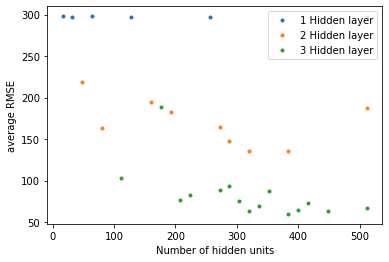

In [33]:
plt.plot(total_num_hidden_units_1,test_eval_1,label="1 Hidden layer",marker=".",linestyle = 'None',)
plt.plot(total_num_hidden_units_2,test_eval_2,label="2 Hidden layer",marker=".",linestyle = 'None',)
plt.plot(total_num_hidden_units_3_avg,test_eval_3_avg,label="3 Hidden layer",marker=".",linestyle = 'None',)
plt.legend()
plt.xlabel("Number of hidden units")
plt.ylabel("average RMSE")
plt.show()

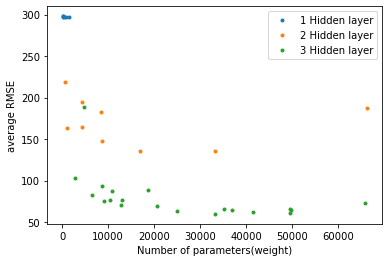

In [34]:

plt.plot(total_num_parameters_1,test_eval_1,label="1 Hidden layer",marker=".",linestyle = 'None',)
plt.plot(total_num_parameters_2,test_eval_2,label="2 Hidden layer",marker=".",linestyle = 'None',)
plt.plot(total_num_parameters_3,test_eval_3,label="3 Hidden layer",marker=".",linestyle = 'None',)
plt.legend()
plt.xlabel("Number of parameters(weight)")
plt.ylabel("average RMSE")
plt.show()

# Plot Q2:

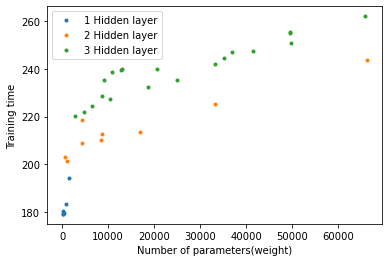

In [35]:
plt.plot(total_num_parameters_1,training_time_1,label="1 Hidden layer",marker=".",linestyle = 'None',)
plt.plot(total_num_parameters_2,training_time_2,label="2 Hidden layer",marker=".",linestyle = 'None',)
plt.plot(total_num_parameters_3,training_time_3,label="3 Hidden layer",marker=".",linestyle = 'None',)
plt.legend()
plt.xlabel("Number of parameters(weight)")
plt.ylabel("Training time")
plt.show()

### As we can see, increasing the number of parameters will decrease the RMSE. as expected but at the cost of a longer training. Also, increasing the number of parameters should be done efficiently by using deeper networks instead of just having more neurons per layer (cf 2 vs 3 hidden layers with same number of parameters). Therefore, if our goal is to reduce the RMSE with a fixed number of parameters, we should definitely increase the number of layers and work with deeper networks.

### However, for the same number of parameters , the training time is not the same and increases as the number of layers increase so there is another tradeoff performance vs training time for a fixed number of parameters. Indeed m as seen in the last curve, for the same number of parameters, training a deeper network is more time consuming than a shallower network. So at the end, we have to consider a time tradeoff but also a performance tradeoff and this is why we should use a deep enough but not too deep neural net so that it does not take too much time to train but it still has good performances when compared to a shallow neural nets with same number of parameters.